# 직원 이직 여부 예측
![](https://github.com/Jangrae/img/blob/master/employee.png?raw=true)

## 데이터 정보
- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

## 데이터셋 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'

data = pd.read_csv(path)

## 데이터 전처리

* 주석을 상세하게 작성해주세요

<details><summary>Hint</summary>

- x, y 구분 필요
- train, test 구분 필요
- 데이터 타입 전처리 필요
- 데이터 인코딩 필요
- null값 확인 필요

In [3]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

In [4]:
# 결측치?
data.isnull().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

In [5]:
# 기초통계정보
data.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1250.000000,1196.000000,1250.000000,1250.00000,1250.000000,1250.0000,1250.000000,1250.000000,1229.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,36.931200,9.258361,2.916800,1030.97120,2.739200,2.7272,2.729600,6525.548000,2.678600,15.216000,2.717600,0.796000,11.33920,2.808000,2.761600,7.117600,4.276000,4.166400
std,9.122162,8.166016,1.025436,603.40408,1.096971,0.7102,1.110617,4676.979554,2.473647,3.625556,1.074977,0.851213,7.79687,1.277357,0.715245,6.246966,3.660074,3.610476
min,18.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,496.25000,2.000000,2.0000,2.000000,2932.250000,1.000000,12.000000,2.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1028.00000,3.000000,3.0000,3.000000,4988.000000,2.000000,14.000000,3.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1567.00000,4.000000,3.0000,4.000000,8437.500000,4.000000,18.000000,4.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,7.000000
max,60.000000,29.000000,5.000000,2068.00000,4.000000,4.0000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.00000,6.000000,4.000000,40.000000,18.000000,17.000000


In [6]:
# 데이터 간 상관관계
data.corr()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
Age,1.000000,-0.010917,0.202924,-0.018403,0.020928,0.028738,-0.016142,0.489822,0.292489,-0.007442,0.050924,0.037167,0.678051,-0.008693,-0.002516,0.315181,0.211881,0.199053
DistanceFromHome,-0.010917,1.000000,0.014234,0.054948,-0.022426,-0.003271,-0.021623,-0.012803,-0.039472,0.052348,0.015040,0.051672,0.002606,-0.039145,-0.023166,0.008645,0.017755,0.008045
Education,0.202924,0.014234,1.000000,0.035299,-0.011476,0.063356,-0.026800,0.084006,0.115528,-0.009160,0.000458,0.035575,0.141025,-0.014650,0.023149,0.073020,0.068414,0.082891
EmployeeNumber,-0.018403,0.054948,0.035299,1.000000,0.019757,0.012572,-0.029219,-0.013571,-0.013080,-0.002839,-0.085708,0.071106,-0.015674,0.004745,0.017754,-0.017434,-0.015468,-0.018975
EnvironmentSatisfaction,0.020928,-0.022426,-0.011476,0.019757,1.000000,0.005208,-0.013242,0.001249,0.021275,-0.051452,0.018290,-0.002147,-0.001444,-0.051192,0.025798,-0.011527,0.004981,-0.006419
JobInvolvement,0.028738,-0.003271,0.063356,0.012572,0.005208,1.000000,-0.026601,-0.012065,0.032613,-0.018453,0.045831,0.015146,-0.010169,-0.027776,-0.016226,-0.028314,0.016360,0.026148
JobSatisfaction,-0.016142,-0.021623,-0.026800,-0.029219,-0.013242,-0.026601,1.000000,-0.023258,-0.047899,0.029032,-0.000973,0.022907,-0.038403,0.005702,-0.015702,-0.016531,-0.011170,-0.034294
MonthlyIncome,0.489822,-0.012803,0.084006,-0.013571,0.001249,-0.012065,-0.023258,1.000000,0.141670,-0.027852,0.021896,0.019676,0.766927,-0.013954,0.048163,0.523550,0.364796,0.339088
NumCompaniesWorked,0.292489,-0.039472,0.115528,-0.013080,0.021275,0.032613,-0.047899,0.141670,1.000000,0.001516,0.035915,0.031366,0.228027,-0.091086,0.000365,-0.126209,-0.094254,-0.118094
PercentSalaryHike,-0.007442,0.052348,-0.009160,-0.002839,-0.051452,-0.018453,0.029032,-0.027852,0.001516,1.000000,-0.031585,0.000280,-0.026669,-0.001929,-0.007605,-0.032690,0.003709,-0.001219


In [7]:
# 결측치 처리 1
# 이전에 일한 회사 수에 대한 무응답은 이전에 일했던 경험이 없다는 뜻으로 해석할 수 있으므로 0으로 대체
data['NumCompaniesWorked'].fillna(0,inplace=True)

In [8]:
# 결측치 처리 2
# 출퇴근 거리는 출퇴근 거리에 영향을 주는 변수를 특정할 수 없으므로 일단 평균값으로 대치
data['DistanceFromHome'].fillna(data['DistanceFromHome'].mean(), inplace=True)

In [9]:
# 결측치 처리 여부 확인
data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

In [10]:
# 변수 정의
target = 'Attrition'
Age = 'Age'
Travel = 'BusinessTravel'
Department = 'Department'
Education = 'Education'
EducationField = 'EducationField'
Distance = 'DistanceFromHome'
EnvironmentSatisfaction = 'EnvironmentSatisfaction'
Sex = 'Gender'
Involvement = 'JobInvolvement'
JobRole = 'JobRole'
JobSatisfaction = 'JobSatisfaction'
Marry = 'MaritalStatus'
Income = 'MonthlyIncome'
WorkedBefore = 'NumCompaniesWorked'
Overtime = 'OverTime'
SalaryIncrease = 'PercentSalaryHike'
Relationship = 'RelationshipSatisfaction'
Stock = 'StockOptionLevel'
WorkingYears = 'TotalWorkingYears'
Training = 'TrainingTimesLastYear'
WLB = 'WorkLifeBalance'
YearsAtCompany = 'YearsAtCompany'
CurrentRole = 'YearsInCurrentRole'
CurrentManager = 'YearsWithCurrManager'

In [11]:
#  사번 데이터 제외 : 사번은 이직 여부 예측에 도움이 안 되는 정보이므로 전처리 과정에서 제외
data.drop(['EmployeeNumber'],axis=1,inplace=True)

# 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1250 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EnvironmentSatisfaction   1250 non-null   int64  
 8   Gender                    1250 non-null   object 
 9   JobInvolvement            1250 non-null   int64  
 10  JobRole                   1250 non-null   object 
 11  JobSatisfaction           1250 non-null   int64  
 12  MaritalStatus             1250 non-null   object 
 13  MonthlyIncome             1250 non-null   int64  
 14  NumCompa

In [12]:
data[target]

0       No
1       No
2       No
3       No
4       No
        ..
1245    No
1246    No
1247    No
1248    No
1249    No
Name: Attrition, Length: 1250, dtype: object

In [13]:
# x, y 정의

x = data.drop(target, axis=1)
y = data[target]

In [14]:
# y값 0,1로 수정(이직한다에 중요성을 둬서 이직한다=1로 설정)
y = y.map({'No':0,'Yes':1})
# 전처리 확인
y.unique()

array([0, 1], dtype=int64)

In [15]:
# 훈련용/시험용 데이터로 분리
from sklearn.model_selection import train_test_split

## 테스트 데이터 크기는 250개(전체 데이터의 20%) 선정
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

## 모델링

1. 전처리에서 제외한 feature를 제외한, 다른 feature는 반드시 모두 사용하셔야 합니다.
2. locally connected layer를 최소 4개 이상 만드세요.
3. 모델 구조 시각화까지 해주면 좋습니다.
4. 학습 횟수는 최대 25번까지만.
---
### **locally하게 연결한 구성 의도를 반드시 상세하게 남겨주세요 (상황 가정을 해서라도!)** 
### **주석 역시 상세하게 남겨주세요**

## -데이터 전처리 과정에서 사번(EmployeeNumber) 제외함-
* 사번은 단순히 사원을 분류하기 위한 일종의 코드에 불과하므로 예측하려는 값(이직 여부)와 상관관계가 없고, 모델 생성 및 학습 과정에서 사번 데이터를 포함할 경우 모델 성능에 악영향을 줄 수 있다고 판단하여 배제

### Locally connected layer를 구성하기 위한 feature 설정

In [16]:
# 필요 라이브러리 불러오기
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate, Add
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

## 로컬 레이어 구성
1. 성별과 결혼여부를 같이 구성 : 성별에 따라, 기혼 여부에 따라 이직여부가 달라질 수 있다고 가정
2. 현재 부서, 직무만족도, 현 직무 연수, 직무를 같이 구성 : 현재 일하는 부서에 얼마나 만족하느냐에 따라 이직에 영향을 줄 수 있음
3. 직무 적극성, 직무 만족도, 동료관계 만족도, 현 팀장과 근무 연수를 같이 구성 : 직장문화, 사내 분위기가 이직에 영향을 줄 수 있음
4. 월급, 급여인상율, 스톡옵션 레벨 : 경제적 보상이 이직에 영향을 줄 수 있음
5. 워라밸, 야근여부, 출퇴근 거리 : 이 세 사항을 워라밸의 요소로 묶어, 워라밸과 이직여부의 상관관계를 분석하고자 함
6. 교육 수준, 전공, 전년 교육훈련 연수 : 교육 수준과 이직 여부의 상관관계를 조사
7. 나이, 현재 부서, 총 근무 연수, 현 직장 근무 연수, 현 직무 연수 : 연령, 경력 수준과 이직 여부의 상관관계 조사

In [17]:
# 성별 숫자 데이터로 전환(여자=0, 남자=1)
x_train[Sex] = x_train[Sex].map({'Female':0,'Male':1})
x_test[Sex] = x_test[Sex].map({'Female':0,'Male':1})

# 확인
x_train[Sex].unique()

array([1, 0], dtype=int64)

In [18]:
# 부서 정보 숫자 데이터로 전환 ( 0=R&D, 1=영업, 2=인사 )
x_train[Department] = x_train[Department].map({'Research & Development':0,'Sales':1,'Human Resources':2})
x_test[Department] = x_test[Department].map({'Research & Development':0,'Sales':1,'Human Resources':2})

# 확인
x_train[Department].unique()

array([0, 1, 2], dtype=int64)

In [19]:
# 야근 여부 숫자 형태로 전환 (Yes가 더 중요한 대답이라 판단해서 1로 지정)
x_train[Overtime] = x_train[Overtime].map({'No':0,'Yes':1})
x_test[Overtime] = x_test[Overtime].map({'No':0,'Yes':1})

# 확인
x_train[Overtime].unique()

array([0, 1], dtype=int64)

In [20]:
# 결혼 여부 숫자 형태로 전환(0=미혼, 1=기혼, 2=이혼)
x_train[Marry] = x_train[Marry].map({'Single':0,'Married':1,'Divorced':2})
x_test[Marry] = x_test[Marry].map({'Single':0,'Married':1,'Divorced':2})

# 확인
x_train[Marry].unique()

array([1, 2, 0], dtype=int64)

In [21]:
# 전공 분야 숫자 형태로 전환(0=기타, 1=의학, 2=생명과학, 3=마케팅, 4=테크니컬, 5=인사 )
x_train[EducationField] = x_train[EducationField].map({'Other':0,'Medical':1,'Life Sciences':2,'Marketing':3,
                                               'Technical Degree':4,'Human Resources':5})
x_test[EducationField] = x_test[EducationField].map({'Other':0,'Medical':1,'Life Sciences':2,'Marketing':3,
                                               'Technical Degree':4,'Human Resources':5})
# 확인
x_train[EducationField].unique()

array([1, 2, 3, 0, 4, 5], dtype=int64)

In [22]:
x_train.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
412,35,Travel_Rarely,0,1.0,4,1,4,1,2,Laboratory Technician,...,0,12,2,1,10,2,3,8,0,7
380,43,Travel_Frequently,1,26.0,2,2,3,1,3,Manager,...,1,12,4,2,25,3,4,25,12,12
593,34,Travel_Rarely,0,19.0,2,1,2,1,3,Laboratory Technician,...,0,11,3,1,3,2,3,2,2,2
267,40,Travel_Rarely,1,22.0,2,3,3,1,2,Sales Executive,...,1,12,1,2,8,6,3,6,4,0
312,33,Travel_Rarely,0,2.0,3,1,3,1,3,Laboratory Technician,...,0,11,4,0,7,3,3,1,1,0


In [23]:
x_train[JobRole].unique()

array(['Laboratory Technician', 'Manager', 'Sales Executive',
       'Manufacturing Director', 'Research Scientist',
       'Sales Representative', 'Human Resources', 'Research Director',
       'Healthcare Representative'], dtype=object)

In [24]:
# 직무, 출장 빈도 숫자로 전환
x_train[Travel] = x_train[Travel].map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})
x_test[Travel] = x_test[Travel].map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})

# 확인
x_train[Travel].unique()

array([1, 2, 0], dtype=int64)

In [25]:
# 직무, 출장 빈도 숫자로 전환
x_train[JobRole] = x_train[JobRole].map({'Laboratory Technician':0,'Manager':1,'Sales Executive':2,'Manufacturing Director':3,
                                        'Research Scientist':4,'Sales Representative':5,'Human Resources':6,
                                        'Research Director':7, 'Healthcare Representative':8})
x_test[JobRole] = x_test[JobRole].map({'Laboratory Technician':0,'Manager':1,'Sales Executive':2,'Manufacturing Director':3,
                                        'Research Scientist':4,'Sales Representative':5,'Human Resources':6,
                                        'Research Director':7, 'Healthcare Representative':8})
# 확인
x_train[JobRole].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [26]:
# 출퇴근 거리 정규화
x_train[Distance] = (x_train[Distance]-x_train[Distance].min())/(x_train[Distance].max()-x_train[Distance].min())

# 확인
x_train[Distance].describe()

count    1000.000000
mean        0.290165
std         0.281470
min         0.000000
25%         0.035714
50%         0.214286
75%         0.428571
max         1.000000
Name: DistanceFromHome, dtype: float64

In [27]:
# 연령 데이터 정규화
x_train[Age] = (x_train[Age]-x_train[Age].min())/(x_train[Age].max()-x_train[Age].min())

# 확인
x_train[Age].describe()

count    1000.000000
mean        0.451667
std         0.219666
min         0.000000
25%         0.285714
50%         0.428571
75%         0.595238
max         1.000000
Name: Age, dtype: float64

In [28]:
# 현 직무 연수 데이터 정규화
x_train[CurrentRole] = (x_train[CurrentRole]-x_train[CurrentRole].min())/(x_train[CurrentRole].max()-x_train[CurrentRole].min())

# 확인
x_train[CurrentRole].describe()

count    1000.000000
mean        0.240444
std         0.205466
min         0.000000
25%         0.111111
50%         0.166667
75%         0.388889
max         1.000000
Name: YearsInCurrentRole, dtype: float64

In [29]:
# 레이어 작성용 변수 설정(훈련 셋)
t_Sex_Marry = x_train.loc[:,[Sex,Marry]]
t_Dep_JSatis_CR_JR = x_train.loc[:,[Department,JobSatisfaction,CurrentRole,JobRole]]
t_Inv_JSatis_Rela_CM = x_train.loc[:,[Involvement,JobSatisfaction,Relationship,CurrentManager]]
t_Inc_Sal_stock = x_train.loc[:,[Income, SalaryIncrease, Stock]]
t_WLB_OT_Dis = x_train.loc[:,[WLB, Overtime, Distance]]
t_Edu_Maj_TT = x_train.loc[:,[Education,EducationField,Training]]
t_Dep_WY_YC_CR = x_train.loc[:,[Age, Department, WorkingYears, YearsAtCompany, CurrentRole]]

In [30]:
tr_list = [t_Sex_Marry,t_Dep_JSatis_CR_JR,t_Inv_JSatis_Rela_CM,t_Inc_Sal_stock,t_WLB_OT_Dis,t_Edu_Maj_TT,t_Dep_WY_YC_CR,x_train]

In [31]:
# 레이어 작성용 변수 설정(테스트 셋)
T_Sex_Marry = x_test.loc[:,[Sex,Marry]]
T_Dep_JSatis_CR_JR = x_test.loc[:,[Department,JobSatisfaction,CurrentRole,JobRole]]
T_Inv_JSatis_Rela_CM = x_test.loc[:,[Involvement,JobSatisfaction,Relationship,CurrentManager]]
T_Inc_Sal_stock = x_test.loc[:,[Income, SalaryIncrease, Stock]]
T_WLB_OT_Dis = x_test.loc[:,[WLB, Overtime, Distance]]
T_Edu_Maj_TT = x_test.loc[:,[Education,EducationField,Training]]
T_Dep_WY_YC_CR = x_test.loc[:,[Age, Department, WorkingYears, YearsAtCompany, CurrentRole]]

In [32]:
Te_list = [T_Sex_Marry,T_Dep_JSatis_CR_JR, T_Inv_JSatis_Rela_CM, T_Inc_Sal_stock, T_WLB_OT_Dis, T_Edu_Maj_TT, T_Dep_WY_YC_CR,x_test]

### 모델 코드 작성

In [45]:
# 세션 클리어
clear_session()

# 모델 레이어 구성
il_1 = Input(shape=(2,))
hl_1 = Dense(256,activation='relu')(il_1)

il_2 = Input(shape=(4,))
hl_2 = Dense(256,activation='relu')(il_2)

il_3 = Input(shape=(4,))
hl_3 = Dense(256,activation='relu')(il_3)

il_4 = Input(shape=(3,))
hl_4 = Dense(256,activation='relu')(il_4)

il_5 = Input(shape=(3,))
hl_5 = Dense(256,activation='relu')(il_5)

il_6 = Input(shape=(3,))
hl_6 = Dense(256,activation='relu')(il_6)

il_7 = Input(shape=(5,))
hl_7 = Dense(256,activation='relu')(il_7)

add1 = Add()([hl_1,hl_2,hl_3,hl_4,hl_5,hl_6,hl_7])
hl_a1 = Dense(256,activation='relu')(add1)

il_c1 = Input(shape=(24,))
cl_2 = Concatenate()([hl_a1,il_c1])
hl_c1 = Dense(256,activation='relu')(cl_2)
hl_c2 = Dense(256,activation='relu')(hl_c1)

ol = Dense(1,activation='sigmoid')(hl_c1)

# 모델 생성
model = Model([il_1,il_2,il_3,il_4,il_5,il_6,il_7,il_c1],ol)

# 모델 컴파일
model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['accuracy'])

## 노드 및 레이어 설계 의도:
* 1번 인풋 레이어 : 성별과 결혼 여부 조합 

* 2번, 3번 인풋 레이어 : 현 부서 만족도와 사내분위기, 사내문화의 경우의 수가 다양할 수 있다고 판단

* 4번 인풋 레이어 : 경제적 보상의 특징에 대한 다양한 경우의 수 예측

* 5번 인풋 레이어 : 워라밸 만족도, 야근 여부와 출퇴근 거리의 조합이 다양한 경우의 수를 유발할 수 있다고 판단

* 6번 인풋 레이어 : 입사 전후, 교육 기간에 따라 교육 수준도 다양한 경우의 수를 갖지 않을까 추측

* 7번 인풋 레이어 : 경력 수준이 다양하게 분류될 수 있다고 생각하여 비교적 많은 노드 수 지정

* add 레이어 : 1~7번 레이어들의 정보를 바탕으로 중간 정리 취합

* c1 레이어 : 최종 검증을 위해 전체 데이터(x_train)과 통합

### 모델 구조 시각화

In [34]:
# 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

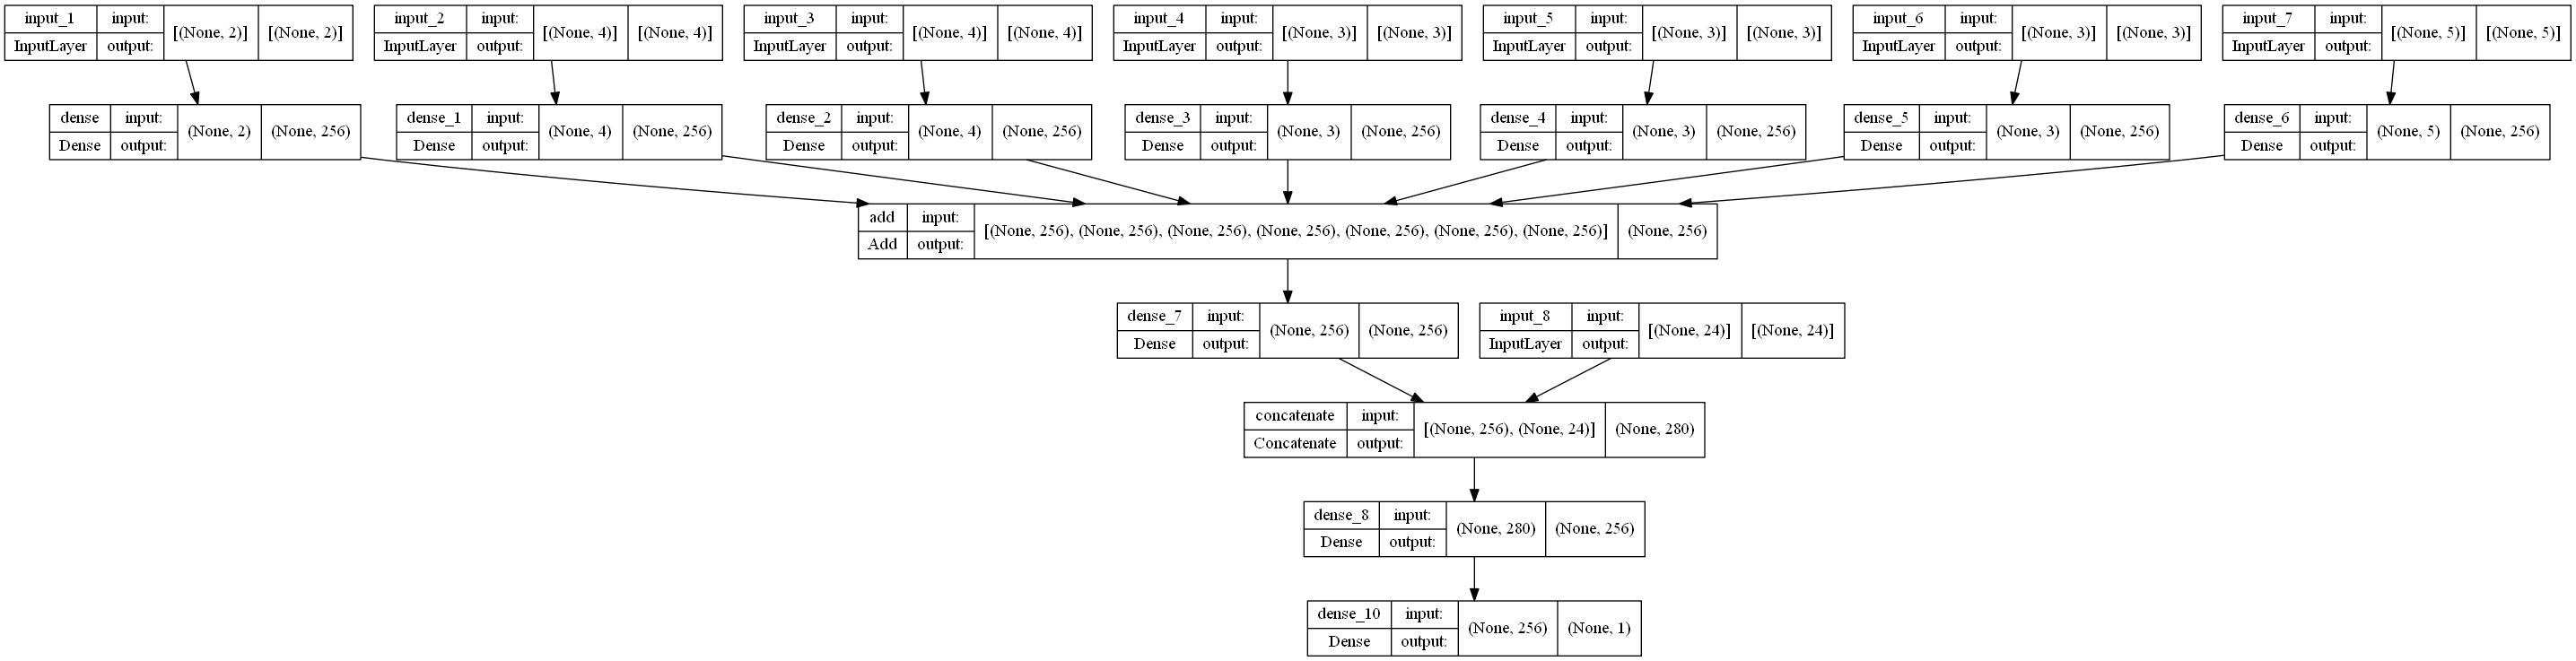

In [35]:
# 요약본 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

### 모델 학습

In [36]:
# 추가 : EarlyStopping 추가
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=30,verbose=1,restore_best_weights=True)

In [46]:
model.fit(tr_list,y_train, epochs=1000, verbose=1, validation_split=0.1, callbacks=[es])

Epoch 1/1000
29/29 [==============================] - 1s 14ms/step - loss: 78.6227 - accuracy: 0.7778 - val_loss: 32.1378 - val_accuracy: 0.8400
Epoch 2/1000
29/29 [==============================] - 0s 4ms/step - loss: 17.0395 - accuracy: 0.7556 - val_loss: 38.4792 - val_accuracy: 0.8400
Epoch 3/1000
29/29 [==============================] - 0s 4ms/step - loss: 27.2903 - accuracy: 0.7422 - val_loss: 36.9417 - val_accuracy: 0.8400
Epoch 4/1000
29/29 [==============================] - 0s 4ms/step - loss: 15.2311 - accuracy: 0.7333 - val_loss: 44.2005 - val_accuracy: 0.8400
Epoch 5/1000
29/29 [==============================] - 0s 4ms/step - loss: 15.6270 - accuracy: 0.7856 - val_loss: 17.2216 - val_accuracy: 0.8400
Epoch 6/1000
29/29 [==============================] - 0s 4ms/step - loss: 14.8732 - accuracy: 0.7456 - val_loss: 32.0254 - val_accuracy: 0.8400
Epoch 7/1000
29/29 [==============================] - 0s 4ms/step - loss: 17.8538 - accuracy: 0.7878 - val_loss: 9.1686 - val_accuracy:

29/29 [==============================] - 0s 4ms/step - loss: 1.6410 - accuracy: 0.8044 - val_loss: 1.4367 - val_accuracy: 0.8500
Epoch 59/1000
29/29 [==============================] - 0s 5ms/step - loss: 2.7974 - accuracy: 0.7911 - val_loss: 1.7338 - val_accuracy: 0.8700
Epoch 60/1000
29/29 [==============================] - 0s 5ms/step - loss: 1.1422 - accuracy: 0.7900 - val_loss: 2.4760 - val_accuracy: 0.8700
Epoch 61/1000
29/29 [==============================] - 0s 4ms/step - loss: 2.6115 - accuracy: 0.7911 - val_loss: 4.6499 - val_accuracy: 0.8400
Epoch 62/1000
29/29 [==============================] - 0s 5ms/step - loss: 1.3188 - accuracy: 0.8144 - val_loss: 2.1348 - val_accuracy: 0.8600
Epoch 63/1000
29/29 [==============================] - 0s 5ms/step - loss: 1.4223 - accuracy: 0.7911 - val_loss: 3.4145 - val_accuracy: 0.8500
Epoch 64/1000
29/29 [==============================] - 0s 4ms/step - loss: 0.8265 - accuracy: 0.8433 - val_loss: 0.8417 - val_accuracy: 0.8400
Epoch 65/1000

### 모델 예측

In [47]:
# 모델 예측
y_pred = model.predict(Te_list)

# 예측값 정리
y_pred = np.around(y_pred)

In [48]:
# 결과 평가
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       207
           1       0.45      0.40      0.42        43

    accuracy                           0.81       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.80      0.81      0.81       250



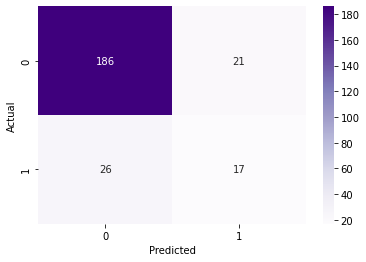

In [49]:
# 결과 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g',cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 평가

1. 모델의 정확도를 기재하시오.
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오.

- 모델 정확도 : 0.72
- 정밀도(이직이라 예측한 것 중 실제로 이직한 비율): 0.28
- 재현도(실제 이직 데이터 중 모델이 이직이라 예측한 비율): 0.40
- 남는다고 예측한 것 중 실제로 남아있는 비율 : 0.86

---
### hidden layer 2개를 사용한 multilayer perceptron 구조와 비교하시오.

In [41]:
## 이하 multilayer perceptron
# 세션 클리어
clear_session()

# 모델 레이어 구성
il_m = Input(shape=(24,))
hl_1_m = Dense(256,activation='relu')(il_m)
hl_2_m = Dense(256,activation='relu')(hl_1_m)
ol_m = Dense(1,activation='sigmoid')(hl_2_m)

# 모델 생성
model = Model(il_m,ol_m)

# 모델 컴파일
model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 256)               6400      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 72,449
Trainable params: 72,449
Non-trainable params: 0
_________________________________________________________________


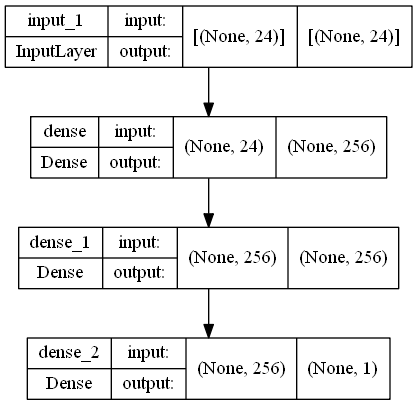

In [42]:
# 모델 요약
model.summary()

# 요약 시각화
plot_model(model, show_layer_names=True, show_shapes=True)

In [43]:
# 모델 예측
y_pred = model.predict(x_test)

* 구조 비교

- 로컬 레이어의 concatenate~ 이후 부분과 유사하다. 다만 변수 별로 세분화되지 않았다 보니 정확도 등의 성능이 개선될 여지가 있다.

- 내가 만든 로컬 레이어가 훨씬 많고 복잡함에도 총 파라미터 수는 2배밖에 차이가 나지 않는다.

- multilayer perception 모델 구조가 훨씬 단순한 만큼 어떤 현상 등을 설명하는 데 유리할 것 같다.